# Virus Chino

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
mainpath = "C:/Users/Guany/Documents/"
#mainpath = "C:/Users/ASUS/Documents/"
#fullpath = "/content/drive/MyDrive/Covid19Casos.csv"
filename = "Covid19casos.csv"
fullpath = os.path.join(mainpath, filename)

In [3]:
VC = pd.read_csv(fullpath)
VC.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2021-04-25
1,10000000,F,52.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2021-04-25
2,10000001,F,22.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2021-04-25
3,10000002,F,43.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2021-04-25
4,10000003,F,33.0,Años,Argentina,CABA,COMUNA 01,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,1,2021-04-25


In [8]:
VC.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,9.585311e+06,9.580772e+06,9.585311e+06,9.585311e+06,9.585311e+06,9.585311e+06
mean,6.047349e+06,3.918079e+01,2.425181e+01,2.305204e+01,2.432991e+01,1.916770e+02
std,2.964327e+06,1.816432e+01,1.715652e+01,2.918956e+01,2.944285e+01,2.488389e+02
min,5.667900e+05,-1.800000e+01,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
25%,3.491888e+06,2.600000e+01,9.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
50%,6.064147e+06,3.700000e+01,1.600000e+01,6.000000e+00,6.000000e+00,6.300000e+01
75%,8.615244e+06,5.000000e+01,4.100000e+01,3.400000e+01,3.800000e+01,3.710000e+02
max,1.114587e+07,2.210000e+02,5.300000e+01,9.400000e+01,9.900000e+01,8.820000e+02


In [9]:
pd.isnull(VC["edad_años_meses"]).values.ravel().sum()

0

In [10]:
VC["fecha_diagnostico"] = pd.to_datetime(VC["fecha_diagnostico"])

In [11]:
pd.isnull(VC["edad"]).values.ravel().sum()

4539

In [12]:
VC["edad"].mean()

39.18079284216345

In [13]:
VC["edad"].describe()

count    9.580772e+06
mean     3.918079e+01
std      1.816432e+01
min     -1.800000e+01
25%      2.600000e+01
50%      3.700000e+01
75%      5.000000e+01
max      2.210000e+02
Name: edad, dtype: float64

In [14]:
VC.loc[737]

id_evento_caso                                 10000699
sexo                                                  M
edad                                                 36
edad_años_meses                                    Años
residencia_pais_nombre                        Argentina
residencia_provincia_nombre                Buenos Aires
residencia_departamento_nombre          Almirante Brown
carga_provincia_nombre                             CABA
fecha_inicio_sintomas                               NaN
fecha_apertura                               2021-04-08
sepi_apertura                                        14
fecha_internacion                                   NaN
cuidado_intensivo                                    NO
fecha_cui_intensivo                                 NaN
fallecido                                            NO
fecha_fallecimiento                                 NaN
asistencia_respiratoria_mecanica                     NO
carga_provincia_id                              

In [15]:
VC.loc[VC['edad_años_meses'] == "Meses", ["edad"]] = 0
VC.loc[VC['edad_años_meses'] == "Meses",  ['edad_años_meses']]= "Años"
VC = VC.drop(VC[VC['edad_años_meses'] == 39].index)
VC = VC.drop(VC[VC['sexo'] == 39].index)

In [16]:
VC['sexo'].value_counts()

F     4941983
M     4542711
NR     100617
Name: sexo, dtype: int64

In [21]:
pd.isnull(VC["edad"]).values.ravel().sum()

0

In [22]:
VC["edad"] = VC["edad"].fillna(int(VC["edad"].mean()))

In [23]:
#VC[VC['edad'] >= 105] = int(VC["edad"].mean())
#VC[VC['edad'] < 0] = int(VC["edad"].mean())
VC.loc[VC['edad']  > 105, ["edad"]] = int(VC["edad"].mean())
VC.loc[VC['edad'] < 0 ,  ['edad']]= int(VC["edad"].mean())

In [24]:
VC["edad"].mean()

39.156018307595865

In [25]:
VC["edad_años_meses"].value_counts()

Años    9585311
Name: edad_años_meses, dtype: int64

In [29]:
VC[VC["edad_años_meses"] == 39]

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion


In [31]:
VC['edad'].value_counts()

30.0     240013
29.0     239706
32.0     229412
31.0     227740
34.0     227013
28.0     226168
33.0     222712
26.0     219724
27.0     219326
35.0     216854
39.0     213325
25.0     210685
36.0     205459
38.0     204872
41.0     204855
37.0     202441
24.0     200989
40.0     199095
42.0     196142
43.0     189982
23.0     185896
44.0     178200
22.0     172819
45.0     171049
46.0     164448
21.0     160612
47.0     152473
48.0     151973
49.0     149902
20.0     145326
          ...  
77.0      31087
78.0      28644
79.0      26462
80.0      25444
0.0       25209
81.0      23857
82.0      21401
83.0      20184
84.0      19136
85.0      17967
86.0      16521
87.0      15275
88.0      14372
89.0      13359
90.0      12389
91.0      10176
92.0       8760
93.0       7404
94.0       5868
95.0       4521
96.0       3583
97.0       2511
98.0       1936
99.0       1201
100.0       822
101.0       435
102.0       232
103.0       164
104.0        63
105.0        59
Name: edad, Length: 106,

In [32]:
VC['edad'].min()

0.0

In [33]:
VC['edad'].max()

105.0

In [34]:
VC["edad"].mode()

0    30.0
dtype: float64

Text(0.5,1,'Histograma de distribucion de testeos covid por edad')

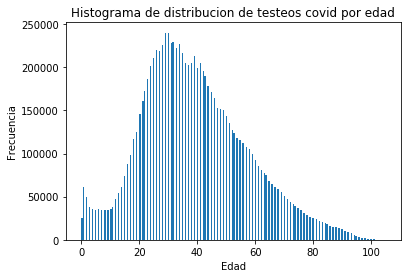

In [37]:
plt.hist(VC["edad"], bins= 200)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de distribucion de testeos covid por edad")

In [38]:
VC["edad"].describe()

count    9.585311e+06
mean     3.915602e+01
std      1.818513e+01
min      0.000000e+00
25%      2.600000e+01
50%      3.700000e+01
75%      5.000000e+01
max      1.050000e+02
Name: edad, dtype: float64

Text(0.5,1,'Boxplot de testeos por edad')

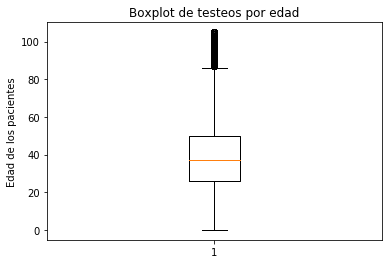

In [40]:
plt.boxplot(VC["edad"])
plt.ylabel("Edad de los pacientes")
plt.title("Boxplot de testeos por edad")

In [41]:
VC["edad"].mode()

0    30.0
dtype: float64

In [42]:
VC['edad_años_meses'].unique()

array(['Años'], dtype=object)

In [ ]:
plt.hist(VC["sexo"], bins=5)
plt.xlabel("Sexo")
plt.ylabel("Cantidad de pacientes")
plt.title("Histograma de distribucion de pacientes covid por sexo")
plt.show()

In [ ]:
VC_provincia = pd.DataFrame()
VC_provincia["provincia"] = VC["residencia_provincia_nombre"]
VC_provincia["cont"] = 1
grupo_provincia = VC_provincia.groupby("provincia")
VC_prov_sum = pd.DataFrame(grupo_provincia.sum("provincia").sort_values("provincia")).reset_index()

In [ ]:
grupo_provincia.sum()

,cont
provincia,
Buenos Aires,3336019
CABA,1857684
Catamarca,59138
Chaco,200022
Chubut,120637
Corrientes,185460
Córdoba,1025517
Entre Ríos,136050
Formosa,86423


In [ ]:
VC_prov_sum.sort_values("cont",ascending=False)

,provincia,cont
0,Buenos Aires,3336019
1,CABA,1857684
6,Córdoba,1025517
21,Santa Fe,573465
24,Tucumán,314436
12,Mendoza,268128
19,San Luis,209678
3,Chaco,200022
5,Corrientes,185460
14,Neuquén,140178


Text(0.5, 1.0, 'Histograma de distribucion de tests por provincia')

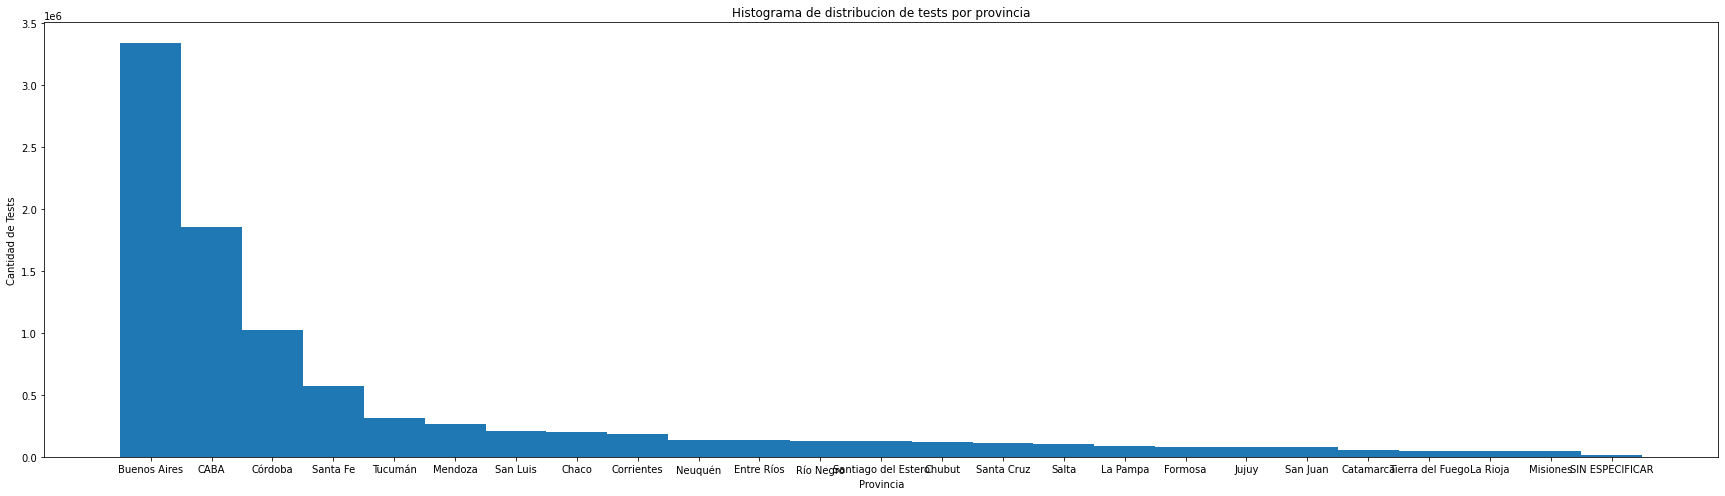

In [ ]:
f, ax = plt.subplots(figsize=(30,8))
plt.bar("provincia", "cont", width=1, data=VC_prov_sum.sort_values("cont",ascending=False))
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Tests")
plt.title("Histograma de distribucion de tests por provincia")

In [ ]:
VC["sexo"].value_counts()

F     4859338
M     4468375
NR      99610
Name: sexo, dtype: int64

In [ ]:
confirmados = VC[["clasificacion_resumen", "fecha_diagnostico", "residencia_provincia_nombre" , "fallecido", "fecha_fallecimiento" ]]

In [ ]:
confirmados = confirmados.replace(to_replace="Confirmado", value=1)

In [ ]:
confirmados["fallecido"] = confirmados.fallecido.replace(to_replace="SI", value=1)
confirmados["fallecido"] = confirmados.fallecido.replace(to_replace="NO", value=0)
#confirmados["fecha_fallecimiento"] = confirmados["fecha_fallecimiento"].fillna("N")

In [ ]:
confirmados["fecha_fallecimiento"].isnull().sum()

9354134

In [ ]:
type(confirmados["fecha_diagnostico"][5])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
confirmados = confirmados.dropna(axis=0, how='all')

In [ ]:
confirmados = confirmados[confirmados["clasificacion_resumen"]== 1]

In [ ]:
confirmados[confirmados["residencia_provincia_nombre"]=="SIN ESPECIFICAR"]

,clasificacion_resumen,fecha_diagnostico,residencia_provincia_nombre,fallecido,fecha_fallecimiento
715,1,2021-04-14,SIN ESPECIFICAR,0,NaN
755,1,2021-04-19,SIN ESPECIFICAR,0,NaN
2786,1,2021-04-09,SIN ESPECIFICAR,0,NaN
4727,1,2021-03-31,SIN ESPECIFICAR,0,NaN
5508,1,2020-05-30,SIN ESPECIFICAR,0,NaN
...,...,...,...,...,...
9415126,1,2021-04-08,SIN ESPECIFICAR,0,NaN
9416277,1,2021-04-06,SIN ESPECIFICAR,0,NaN
9417811,1,2020-06-03,SIN ESPECIFICAR,0,NaN
9418533,1,2020-06-02,SIN ESPECIFICAR,0,NaN


In [ ]:
#confirmados = confirmados.drop(labels="clasificacion_resumen", axis=1)

In [ ]:
#confirmados = confirmados.drop(labels=2192241, axis=0)
#confirmados = confirmados.drop(labels=2337905, axis=0)
#confirmados = confirmados.drop(labels=2440280, axis=0)
#confirmados = confirmados.drop(labels=4794269, axis=0)
#confirmados = confirmados.drop(labels=1619136, axis=0)
#confirmados = confirmados.drop(labels=6949111, axis=0)
#confirmados = confirmados.drop(labels=1824030, axis=0)

In [ ]:
confirmados = confirmados[confirmados["fecha_diagnostico"] > "2020-03-02"]

In [ ]:
confirmados["fecha_diagnostico"] = pd.to_datetime(confirmados["fecha_diagnostico"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
confirmados = confirmados.sort_values("fecha_diagnostico")

In [ ]:
confirmados = confirmados.reset_index()
confirmados = confirmados.drop(labels="index", axis=1)

In [ ]:
data_casos_provincia = pd.DataFrame(confirmados.groupby("residencia_provincia_nombre").sum())
data_casos_provincia = data_casos_provincia.reset_index()
#data_casos_provincia = data_casos_provincia.drop(labels="index", axis=1)

In [ ]:
data_casos_provincia

,residencia_provincia_nombre,clasificacion_resumen,fallecido
0,Buenos Aires,1077191,30746
1,CABA,316047,7390
2,Catamarca,13481,19
3,Chaco,42512,1003
4,Chubut,37600,801
5,Corrientes,35557,432
6,Córdoba,212377,3246
7,Entre Ríos,47199,996
8,Formosa,3830,61
9,Jujuy,23986,1012


In [ ]:
data_casos_provincia.columns

Index(['residencia_provincia_nombre', 'clasificacion_resumen', 'fallecido'], dtype='object')

Text(0.5, 1.0, 'Histograma de distribucion de casos por provincia')

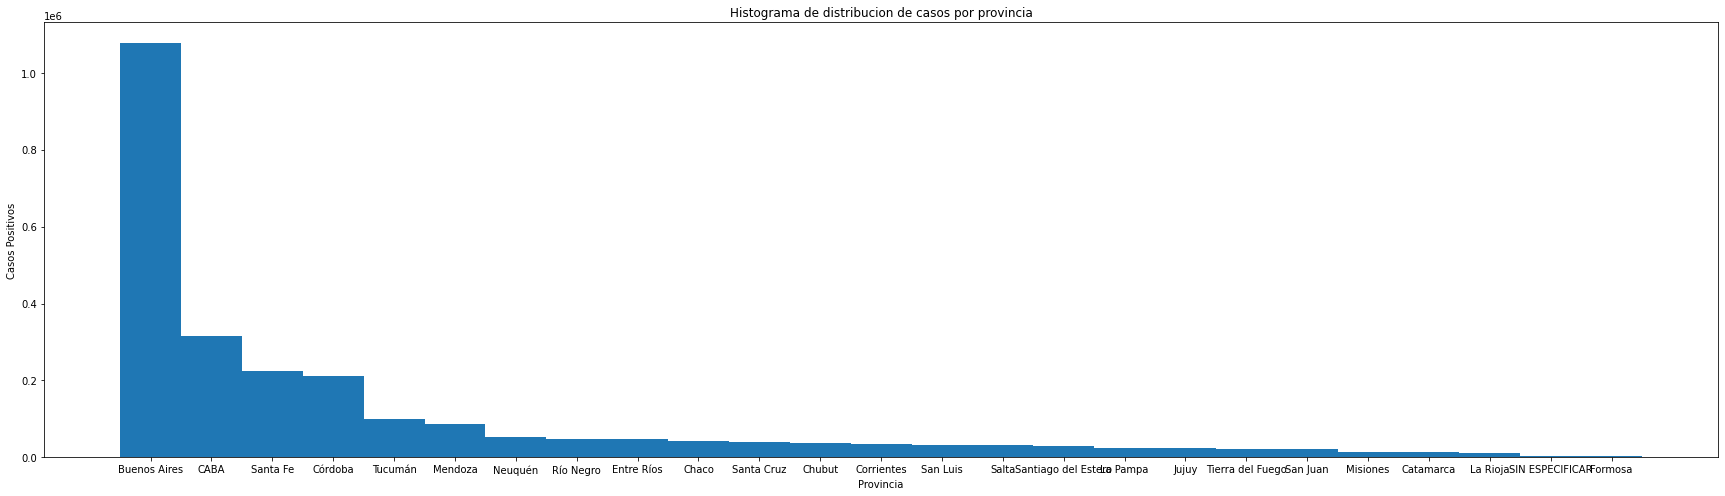

In [ ]:
f, ax = plt.subplots(figsize=(30,8))
plt.bar("residencia_provincia_nombre", "clasificacion_resumen", width=1, data=data_casos_provincia.sort_values("clasificacion_resumen",ascending=False))
plt.xlabel("Provincia")
plt.ylabel("Casos Positivos")
plt.title("Histograma de distribucion de casos por provincia")

In [ ]:
type(confirmados["fecha_diagnostico"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
confirmados[confirmados["fallecido"]==1]

,clasificacion_resumen,fecha_diagnostico,residencia_provincia_nombre,fallecido,fecha_fallecimiento
8,1,2020-03-07,CABA,1,2020-03-07
30,1,2020-03-12,Chaco,1,2020-03-13
35,1,2020-03-12,Buenos Aires,1,2020-03-24
44,1,2020-03-13,CABA,1,2020-03-18
55,1,2020-03-15,CABA,1,2020-07-11
...,...,...,...,...,...
2550463,1,2021-04-22,Río Negro,1,2021-04-21
2550511,1,2021-04-22,Córdoba,1,2021-04-16
2551446,1,2021-04-22,Buenos Aires,1,2021-04-21
2552168,1,2021-04-22,Misiones,1,2021-04-19


In [ ]:
confirmados["clasificacion_resumen"]=1

In [ ]:
confirmgroup = confirmados.groupby("fecha_diagnostico")

In [ ]:
confirmgroup.sum()

,clasificacion_resumen,fallecido
fecha_diagnostico,,
2020-03-03,1,0
2020-03-06,7,0
2020-03-07,1,1
2020-03-08,2,0
2020-03-09,6,0
...,...,...
2021-04-18,10623,16
2021-04-19,23132,41
2021-04-20,22834,15


In [ ]:
confirmgroup.head(10)

,clasificacion_resumen,fecha_diagnostico,residencia_provincia_nombre,fallecido,fecha_fallecimiento
0,1,2020-03-03,CABA,0,NaN
1,1,2020-03-06,Córdoba,0,NaN
2,1,2020-03-06,Buenos Aires,0,NaN
3,1,2020-03-06,CABA,0,NaN
4,1,2020-03-06,CABA,0,NaN
...,...,...,...,...,...
2548016,1,2021-04-22,Entre Ríos,0,NaN
2548017,1,2021-04-22,Buenos Aires,0,NaN
2548018,1,2021-04-22,Buenos Aires,0,NaN
2548019,1,2021-04-22,CABA,0,NaN


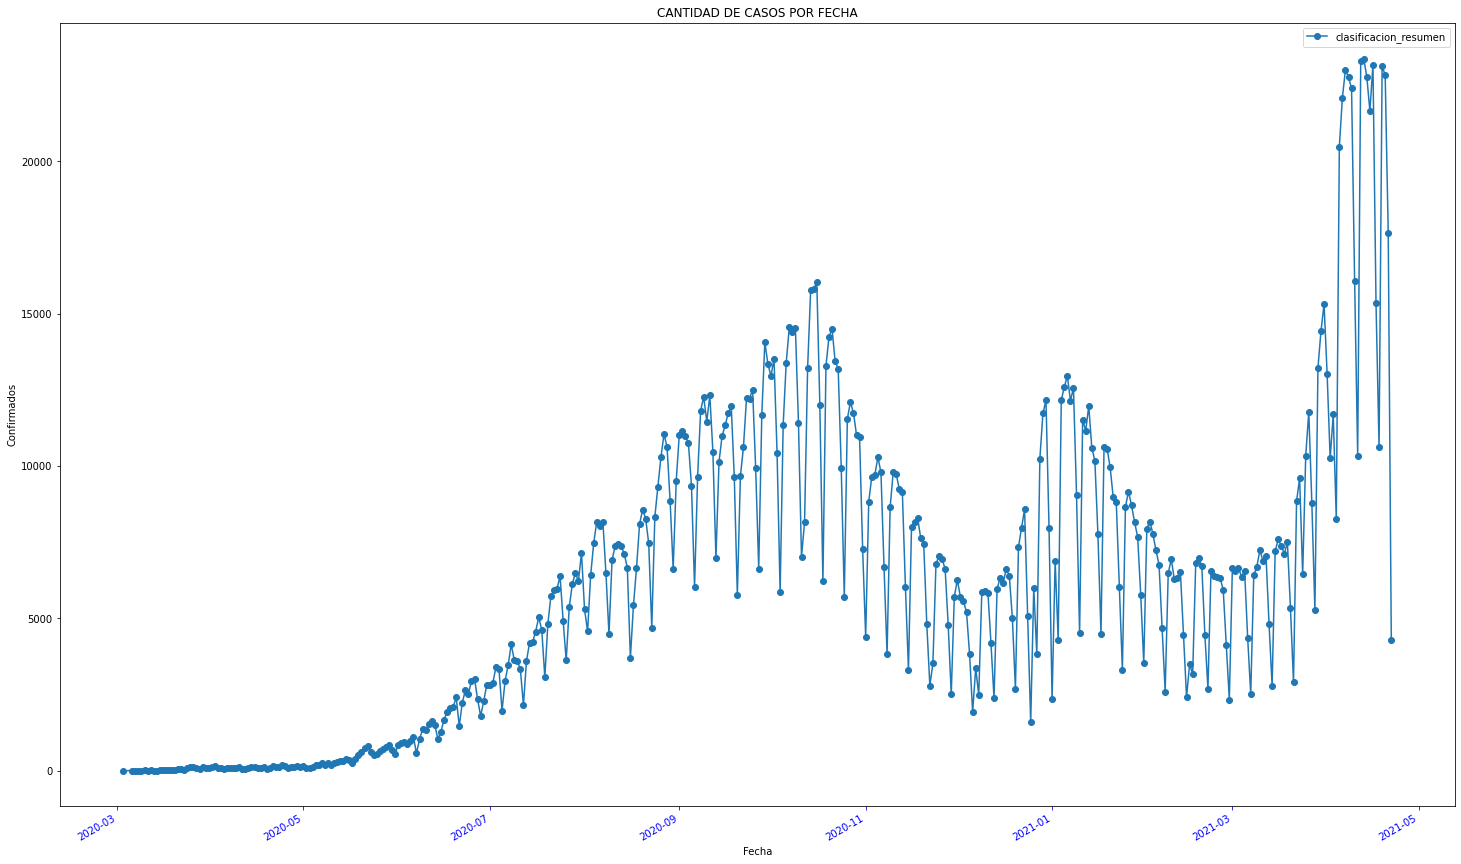

In [ ]:
confirmgroup.sum().plot(kind="line",y="clasificacion_resumen", figsize=(25,16), marker= "o")
#linestyle"--""
plt.xlabel("Fecha")
plt.title("CANTIDAD DE CASOS POR FECHA")
plt.tick_params('x', colors='blue')
plt.ylabel("Confirmados")
plt.show()

In [ ]:
fall = pd.DataFrame()
fall["fallecido"] = confirmados["fallecido"]
fall["fecha_fallecimiento"] = confirmados["fecha_fallecimiento"]
fall["provincia"] = confirmados["residencia_provincia_nombre"]
fall = fall[fall["fallecido"]==1]

In [ ]:
fall_provincia = pd.DataFrame(fall.groupby("provincia").sum())
fall_provincia = fall_provincia.reset_index()
#fall_provincia = fall_provincia.drop(labels="index", axis=1)

In [ ]:
fall_provincia.head()

,provincia,fallecido
0,Buenos Aires,30746
1,CABA,7390
2,Catamarca,19
3,Chaco,1003
4,Chubut,801


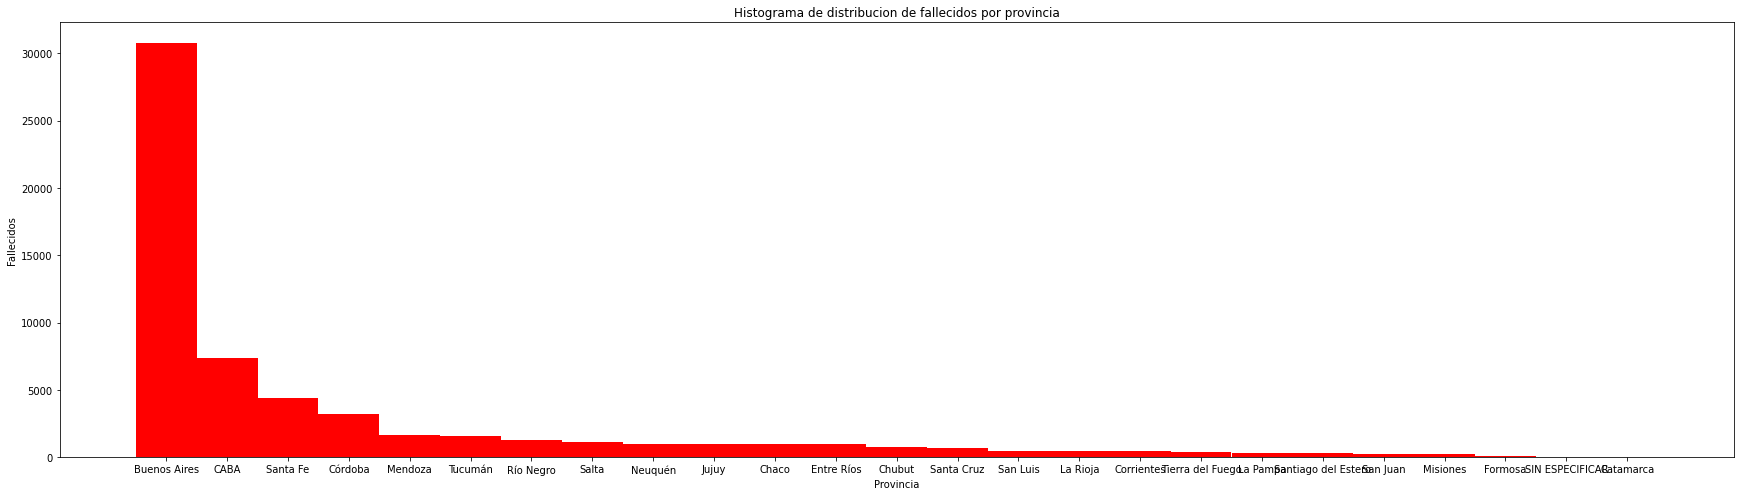

In [ ]:
f, ax = plt.subplots(figsize=(30,8))
plt.bar("provincia", "fallecido", width=1, data=fall_provincia.sort_values("fallecido",ascending=False), color="r")
plt.xlabel("Provincia")
plt.ylabel("Fallecidos")
plt.title("Histograma de distribucion de fallecidos por provincia")
plt.show()

In [ ]:
fallgroup = fall.groupby("fecha_fallecimiento")
fallgroup.sum().tail()

,fallecido
fecha_fallecimiento,
2021-04-18,122
2021-04-19,133
2021-04-20,98
2021-04-21,103
2021-04-22,20


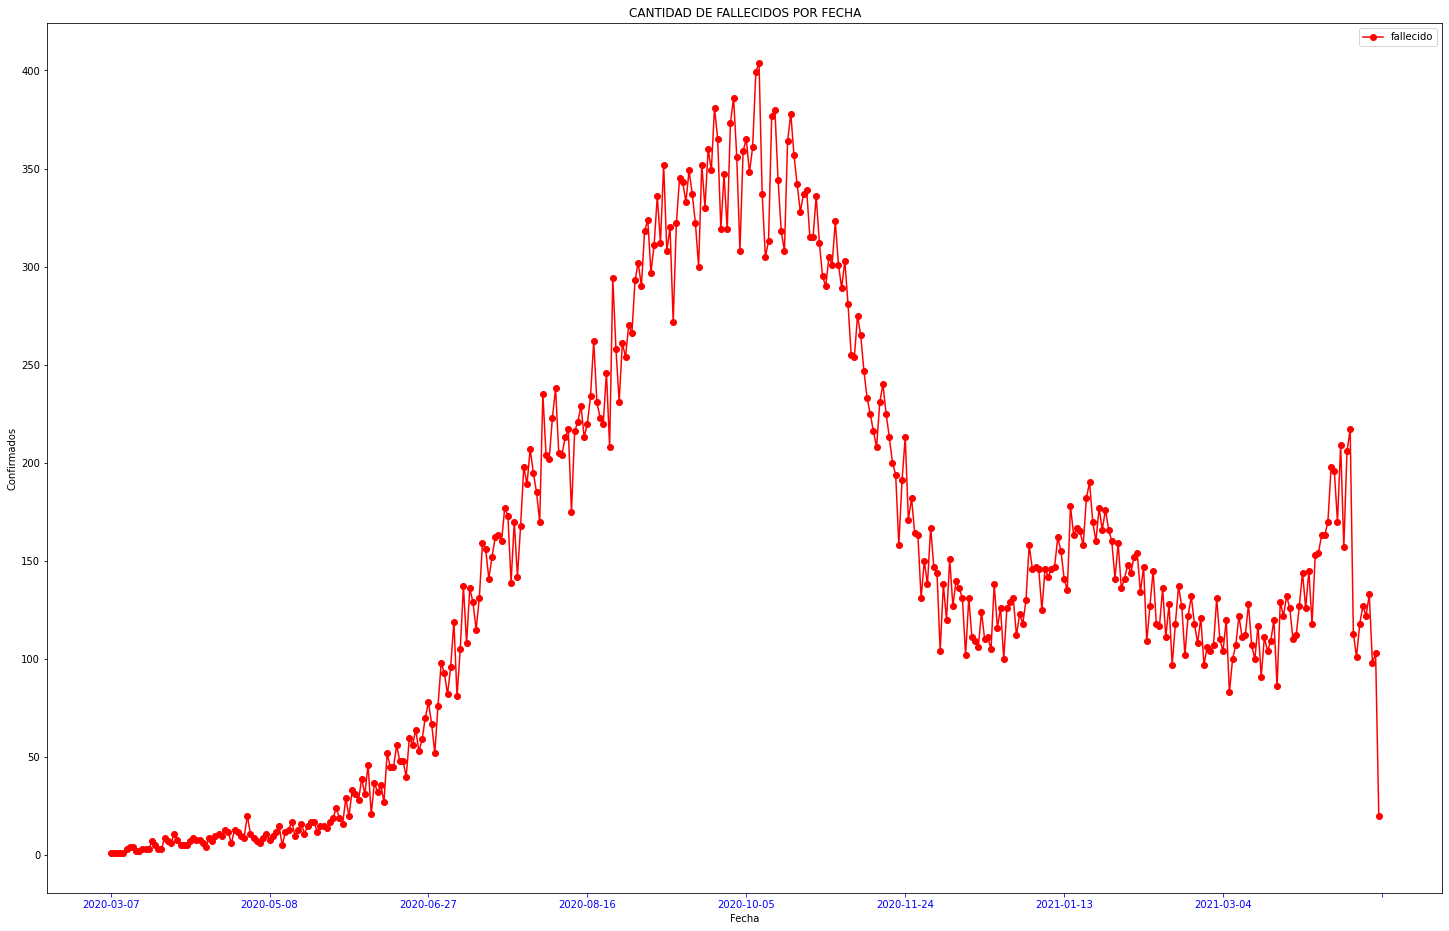

In [ ]:
fallgroup.sum().plot(kind="line",y="fallecido", figsize=(25,16), marker= "o", color="r")
#linestyle"--""
plt.xlabel("Fecha")
plt.title("CANTIDAD DE FALLECIDOS POR FECHA")
plt.tick_params('x', colors='blue')
plt.ylabel("Confirmados")
plt.show()

In [ ]:
confirmgroup.head()

,clasificacion_resumen,fecha_diagnostico,residencia_provincia_nombre,fallecido,fecha_fallecimiento
0,1,2020-03-03,CABA,0,NaN
1,1,2020-03-06,Córdoba,0,NaN
2,1,2020-03-06,Buenos Aires,0,NaN
3,1,2020-03-06,CABA,0,NaN
4,1,2020-03-06,CABA,0,NaN
...,...,...,...,...,...
2548011,1,2021-04-22,Buenos Aires,0,NaN
2548012,1,2021-04-22,Buenos Aires,0,NaN
2548013,1,2021-04-22,Río Negro,0,NaN
2548014,1,2021-04-22,Buenos Aires,0,NaN


In [ ]:
confirmgroup["clasificacion_resumen"].sum()

fecha_diagnostico
2020-03-03        1
2020-03-06        7
2020-03-07        1
2020-03-08        2
2020-03-09        6
              ...  
2021-04-18    10623
2021-04-19    23132
2021-04-20    22834
2021-04-21    17644
2021-04-22     4295
Name: clasificacion_resumen, Length: 414, dtype: int64

In [ ]:
cont = 1
dataregresion = pd.DataFrame(confirmgroup.sum())
dataregresion["dia"] = 1
dataregresion = dataregresion.reset_index()
for i in range (len(dataregresion)):
    dataregresion["dia"][i] = cont
    cont = cont + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataregresion.tail()

,fecha_diagnostico,clasificacion_resumen,fallecido,dia
409,2021-04-18,10623,16,410
410,2021-04-19,23132,41,411
411,2021-04-20,22834,15,412
412,2021-04-21,17644,22,413
413,2021-04-22,4295,8,414


In [ ]:
#cont = 1
#dataregresion = pd.DataFrame(columns=["Fecha", "Positivos", "Dia"])
#dataregresion["Positivos"] = confirmgroup["clasificacion_resumen"].sum()
#dataregresion["Fecha"] = confirmgroup["fecha_diagnostico"]
#dataregresion = dataregresion.reset_index()
#dataregresion = dataregresion.drop(labels="index", axis=1)
#for i in range (len(dataregresion)):
 #   dataregresion["Dia"][i] = cont
 #   cont = cont + 1

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataregresion.head()

,fecha_diagnostico,clasificacion_resumen,fallecido,dia
0,2020-03-03,1,0,1
1,2020-03-06,7,0,2
2,2020-03-07,1,1,3
3,2020-03-08,2,0,4
4,2020-03-09,6,0,5


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_pred = dataregresion["dia"]
X_pred = X_pred[:,np.newaxis]
Y = dataregresion["clasificacion_resumen"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_


276.23506567942877

In [ ]:
lm.coef_

array([28.37954348])

In [ ]:
lm.score(X_pred, Y)

0.4330706550784228

#### y = 276.235066 + 28.3796 * dia

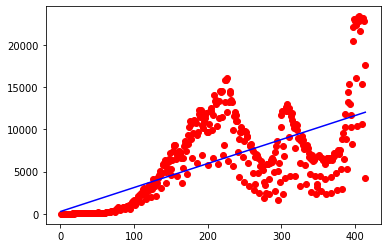

In [ ]:
%matplotlib inline
plt.plot(X_pred,Y, "ro")
plt.plot(X_pred, lm.predict(X_pred), color="blue")

In [ ]:
SSD = np.sum((Y - lm.predict(X_pred))**2)
RSE = np.sqrt(SSD/(len(X_pred)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(6234451256.700005, 3885.295821938267, 6164.990338164252, 63.02192880800509)

#### intentando una cuadratica

In [ ]:
X_data = dataregresion["Dia"]**2
X_data = np.asarray(X_data)
X_data = X_data[:,np.newaxis]
lm = LinearRegression()
lm.fit(X_data, Y)
lm.score(X_data, Y)

0.3414886440378395

In [ ]:
dataregresion.tail()

,Fecha,Positivos,Dia
407,2021-04-16,22491,408
408,2021-04-17,14724,409
409,2021-04-18,9899,410
410,2021-04-19,18932,411
411,2021-04-20,5884,412


In [ ]:
dataregresion_corto = dataregresion[(dataregresion["Fecha"]>"2021-03-18") & (dataregresion["Fecha"]<"2021-04-20")]

In [ ]:
dataregresion_corto.tail()

,Fecha,Positivos,Dia
406,2021-04-15,21191,407
407,2021-04-16,22491,408
408,2021-04-17,14724,409
409,2021-04-18,9899,410
410,2021-04-19,18932,411


In [ ]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(6806145122.383106, 4069.3935422147056, 6078.228155339806, 66.95032562474128)

In [ ]:
lm.intercept_, lm.coef_ , lm.score(X_data, Y), 

(2801.371173511617, array([0.05770384]), 0.3414886440378395)

In [ ]:
dataregresion_corto = dataregresion_corto.reset_index()

In [ ]:
dataregresion_corto = dataregresion_corto.drop(labels="index", axis=1)

In [ ]:
#X_data = dataregresion_corto["Dia"]
X_data =np.arange(0,len(dataregresion_corto))
X_data = X_data[:,np.newaxis]
Y = dataregresion_corto["Positivos"]

In [ ]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
lm.intercept_, lm.coef_ , lm.score(X_data, Y), 

(6871.28307692308, array([728.55307692]), 0.6839909027898381)

#### Funcion y= 6871.283077 + 728.553077*Dia Numero

In [ ]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(318797572.1776922, 3644.616876171007, 15613.92, 23.342100357700097)

In [ ]:
6871.283077 + (728.553077*413)

307763.70387800003

In [ ]:
dataregresion_corto.head()

,Fecha,Positivos,Dia
0,2021-03-19,7494,380
1,2021-03-20,5350,381
2,2021-03-21,2900,382
3,2021-03-22,8845,383
4,2021-03-23,9590,384


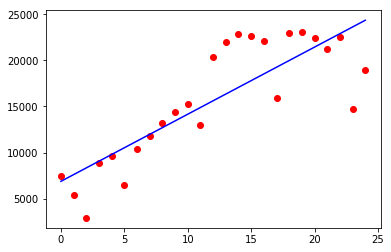

In [ ]:
%matplotlib inline
plt.plot(X_data,Y, "ro")
plt.plot(X_data, lm.predict(X_data), color="blue")

In [ ]:
dataregresion_corto[(dataregresion_corto["Dia"] > 387) & (dataregresion_corto["Positivos"] < 12000) ]

,Fecha,Positivos,Dia


In [ ]:
#dataregresion_corto = dataregresion_corto.drop([8, 9, 16, 23, 30, 14 ,15]) #LIMPIANDO OUTLIERS